In [1]:
import numpy as np 
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [2]:
iris = load_iris()

X = iris.data[:, (2,3)]
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron()
per_clf.fit(X, y)
y_pred = per_clf.predict([[2,.5]])
y_pred

array([0])

Tensorflow


In [3]:
import tensorflow as tf
from tensorflow import keras

tf.__version__
keras.__version__

2023-03-27 17:27:05.670929: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


'2.4.0'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test)  = fashion_mnist.load_data()

In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:] 

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [8]:
class_names[y_train[0]]

'Coat'

building the model

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

2023-03-27 17:27:07.551349: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-03-27 17:27:07.551918: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-03-27 17:27:07.559905: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-27 17:27:07.560016: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1060 6GB computeCapability: 6.1
coreClock: 1.8475GHz coreCount: 10 deviceMemorySize: 5.93GiB deviceMemoryBandwidth: 178.99GiB/s
2023-03-27 17:27:07.560038: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2023-03-27 17:27:07.561660: I tensorflow/stream_executor/platfo

In [10]:
#or 
model = keras.models.Sequential([
(keras.layers.Flatten(input_shape=[28,28])),
(keras.layers.Dense(300, activation = 'relu')),
(keras.layers.Dense(100, activation = 'relu')),
(keras.layers.Dense(10, activation='softmax'))
    
])

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


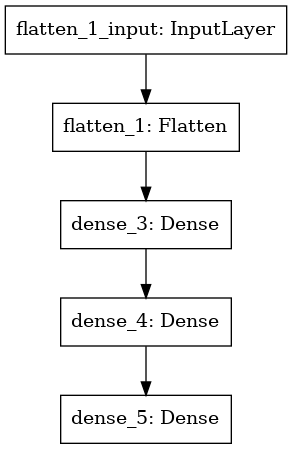

In [12]:
keras.utils.plot_model(model)

In [13]:
hidden_1 = model.layers[1]
weigths, biases = hidden_1.get_weights()
weigths.shape

(784, 300)

compilando o modelo

In [14]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd",metrics=['accuracy'])

In [15]:
history = model.fit(X_train,y_train, epochs=30, validation_data=(X_valid, y_valid))

2023-03-27 17:27:09.014018: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-03-27 17:27:09.014303: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2899885000 Hz


Epoch 1/30
1719/1719 [==============================] - 2s 908us/step - loss: 0.9741 - accuracy: 0.6854 - val_loss: 0.4929 - val_accuracy: 0.8342
Epoch 2/30
1719/1719 [==============================] - 1s 746us/step - loss: 0.5008 - accuracy: 0.8265 - val_loss: 0.4558 - val_accuracy: 0.8436
Epoch 3/30
1719/1719 [==============================] - 1s 757us/step - loss: 0.4517 - accuracy: 0.8431 - val_loss: 0.4098 - val_accuracy: 0.8604
Epoch 4/30
1719/1719 [==============================] - 1s 748us/step - loss: 0.4203 - accuracy: 0.8526 - val_loss: 0.4021 - val_accuracy: 0.8642
Epoch 5/30
1719/1719 [==============================] - 1s 761us/step - loss: 0.3945 - accuracy: 0.8615 - val_loss: 0.4077 - val_accuracy: 0.8622
Epoch 6/30
1719/1719 [==============================] - 1s 743us/step - loss: 0.3788 - accuracy: 0.8647 - val_loss: 0.3862 - val_accuracy: 0.8664
Epoch 7/30
1719/1719 [==============================] - 1s 740us/step - loss: 0.3681 - accuracy: 0.8679 - val_loss: 0.3740 -

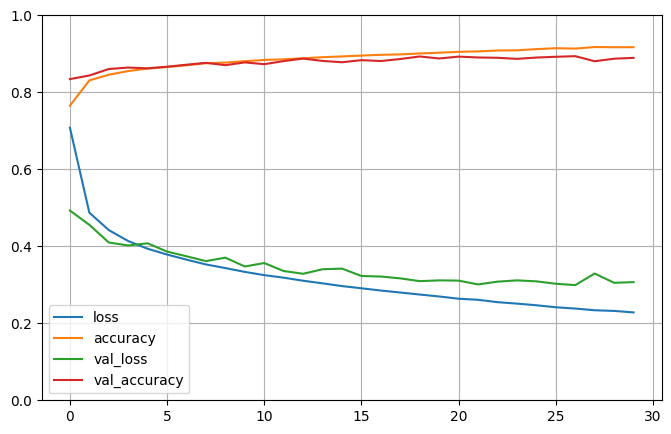

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [17]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 664us/step - loss: 68.5612 - accuracy: 0.8453


[68.56117248535156, 0.845300018787384]

predict

In [18]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [19]:
y_pred = model.predict_classes(X_new)
y_pred

/home/pedro/miniconda3/envs/tf2/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1])

In [20]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

Regression

In [21]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

In [22]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [23]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = 'relu', input_shape = X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train,epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 0s 618us/step - loss: 1.3253 - val_loss: 1.4649
Epoch 2/20
363/363 [==============================] - 0s 440us/step - loss: 1.1018 - val_loss: 0.5858
Epoch 3/20
363/363 [==============================] - 0s 443us/step - loss: 0.4838 - val_loss: 0.9849
Epoch 4/20
363/363 [==============================] - 0s 433us/step - loss: 0.4395 - val_loss: 3.5759
Epoch 5/20
363/363 [==============================] - 0s 441us/step - loss: 0.9948 - val_loss: 2.2893
Epoch 6/20
363/363 [==============================] - 0s 438us/step - loss: nan - val_loss: nan
Epoch 7/20
363/363 [==============================] - 0s 441us/step - loss: nan - val_loss: nan
Epoch 8/20
363/363 [==============================] - 0s 427us/step - loss: nan - val_loss: nan
Epoch 9/20
363/363 [==============================] - 0s 440us/step - loss: nan - val_loss: nan
Epoch 10/20
363/363 [==============================] - 0s 441us/step - loss: nan - val_loss: nan
Epoch 11/

In [24]:
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

162/162 [==============================] - 0s 270us/step - loss: nan


array([[nan],
       [nan],
       [nan]], dtype=float32)

In [25]:
import tensorflow as tf
import tensorflow.keras as keras

Functional Api

In [26]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [27]:
input_layer = keras.layers.Input(shape= X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_layer)
hidden2 = keras.layers.Dense(30,activation='relu')(hidden1)
concat = keras.layers.Concatenate()([hidden2, input_layer])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_layer],outputs=[output])


In [28]:
input_A = keras.layers.Input(shape=[5],name="wide_input")
input_B = keras.layers.Input(shape=[6],name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30,activation='relu')(hidden1)
concat = keras.layers.concatenate([hidden2, input_A])
output = keras.layers.Dense(1,name='output')(concat)
model = keras.Model(inputs=[input_A, input_B],outputs=[output])

In [29]:
X_train_A, X_train_B = X_train[:, :5], X_train[:,2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:,2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:,2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [30]:
model.compile(optimizer='sgd',loss='mse')

In [31]:
history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B),y_valid))

Epoch 1/20
363/363 [==============================] - 0s 667us/step - loss: 1.5003 - val_loss: 4.4215
Epoch 2/20
363/363 [==============================] - 0s 478us/step - loss: 0.5586 - val_loss: 2.7523
Epoch 3/20
363/363 [==============================] - 0s 482us/step - loss: 0.4469 - val_loss: 1.8948
Epoch 4/20
363/363 [==============================] - 0s 480us/step - loss: 0.4167 - val_loss: 1.6717
Epoch 5/20
363/363 [==============================] - 0s 476us/step - loss: 0.4239 - val_loss: 0.5253
Epoch 6/20
363/363 [==============================] - 0s 505us/step - loss: 0.3987 - val_loss: 0.3676
Epoch 7/20
363/363 [==============================] - 0s 480us/step - loss: 0.4008 - val_loss: 0.3679
Epoch 8/20
363/363 [==============================] - 0s 480us/step - loss: 0.3846 - val_loss: 0.3752
Epoch 9/20
363/363 [==============================] - 0s 486us/step - loss: 0.3783 - val_loss: 0.3627
Epoch 10/20
363/363 [==============================] - 0s 484us/step - loss: 0.390

In [32]:
mse_test = model.evaluate((X_test_A,X_test_B),y_test)
y_pred = model.predict((X_new_A, X_new_B))

162/162 [==============================] - 0s 291us/step - loss: 0.3433


In [33]:
input_A = keras.layers.Input(shape=[5],name="wide_input")
input_B = keras.layers.Input(shape=[6],name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30,activation='relu')(hidden1)
concat = keras.layers.concatenate([hidden2, input_A])
output = keras.layers.Dense(1,name='main_output')(concat)
output_aux = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B],outputs=[output, output_aux])

In [34]:
model.compile(optimizer='sgd',loss=['mse','mse'],loss_weights=[0.9, 0.1])

In [35]:
history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=(([X_valid_A, X_valid_B],[y_valid])))

Epoch 1/20
363/363 [==============================] - 1s 770us/step - loss: 1.4083 - main_output_loss: 1.2178 - aux_output_loss: 3.1225 - val_loss: 0.5489 - val_main_output_loss: 0.6099 - val_aux_output_loss: 0.0000e+00
Epoch 2/20
363/363 [==============================] - 0s 547us/step - loss: 0.5642 - main_output_loss: 0.5102 - aux_output_loss: 1.0507 - val_loss: 0.3983 - val_main_output_loss: 0.4425 - val_aux_output_loss: 0.0000e+00
Epoch 3/20
363/363 [==============================] - 0s 538us/step - loss: 0.4958 - main_output_loss: 0.4577 - aux_output_loss: 0.8389 - val_loss: 0.3571 - val_main_output_loss: 0.3968 - val_aux_output_loss: 0.0000e+00
Epoch 4/20
363/363 [==============================] - 0s 547us/step - loss: 0.4494 - main_output_loss: 0.4180 - aux_output_loss: 0.7319 - val_loss: 0.3569 - val_main_output_loss: 0.3965 - val_aux_output_loss: 0.0000e+00
Epoch 5/20
363/363 [==============================] - 0s 546us/step - loss: 0.4490 - main_output_loss: 0.4275 - aux_outp

In [36]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A,X_test_B],[y_test,y_test])

162/162 [==============================] - 0s 650us/step - loss: 0.3628 - main_output_loss: 0.3528 - aux_output_loss: 0.4523


In [37]:
model.save("my_model_keras.h5")

In [38]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

SubClassing API

In [39]:
class WideDeepModel(keras.Model):
    def __init__(self, units=30, activation = 'relu',**kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation= activation)
        self.hidden2 = keras.layers.Dense(units, activation= activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self,inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A,hidden2])
        main_output =  self.main_output(concat) 
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

In [40]:
model = WideDeepModel()

In [41]:
model.compile(optimizer='sgd',loss=['mse','mse'],loss_weights=[0.9, 0.1])
history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=(([X_valid_A, X_valid_B],[y_valid])))

Epoch 1/20
363/363 [==============================] - 1s 772us/step - loss: 1.6029 - output_1_loss: 1.3503 - output_2_loss: 3.8762 - val_loss: 8.2770 - val_output_1_loss: 9.1967 - val_output_2_loss: 0.0000e+00
Epoch 2/20
363/363 [==============================] - 0s 550us/step - loss: 0.5593 - output_1_loss: 0.5062 - output_2_loss: 1.0376 - val_loss: 1.2913 - val_output_1_loss: 1.4348 - val_output_2_loss: 0.0000e+00
Epoch 3/20
363/363 [==============================] - 0s 547us/step - loss: 0.7308 - output_1_loss: 0.7060 - output_2_loss: 0.9543 - val_loss: 0.4660 - val_output_1_loss: 0.5177 - val_output_2_loss: 0.0000e+00
Epoch 4/20
363/363 [==============================] - 0s 535us/step - loss: 0.4672 - output_1_loss: 0.4340 - output_2_loss: 0.7662 - val_loss: 0.3702 - val_output_1_loss: 0.4114 - val_output_2_loss: 0.0000e+00
Epoch 5/20
363/363 [==============================] - 0s 540us/step - loss: 0.4475 - output_1_loss: 0.4197 - output_2_loss: 0.6980 - val_loss: 0.3487 - val_outp

In [42]:
model = keras.models.load_model("my_model_keras.h5")

callbacks

In [43]:
input_A = keras.layers.Input(shape=[5],name="wide_input")
input_B = keras.layers.Input(shape=[6],name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30,activation='relu')(hidden1)
concat = keras.layers.concatenate([hidden2, input_A])
output = keras.layers.Dense(1,name='main_output')(concat)
output_aux = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B],outputs=[output, output_aux])

In [44]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
early_stopping_callback = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
model.compile(optimizer='sgd',loss=['mse','mse'],loss_weights=[0.9, 0.1])
history = model.fit((X_train_A, X_train_B), y_train, epochs=200, validation_data=(([X_valid_A, X_valid_B],[y_valid])),callbacks=[checkpoint_cb,early_stopping_callback])

Epoch 1/200
363/363 [==============================] - 1s 769us/step - loss: 1.5557 - main_output_loss: 1.4096 - aux_output_loss: 2.8714 - val_loss: 4.2672 - val_main_output_loss: 4.7414 - val_aux_output_loss: 0.0000e+00
Epoch 2/200
363/363 [==============================] - 0s 549us/step - loss: 0.5748 - main_output_loss: 0.5050 - aux_output_loss: 1.2026 - val_loss: 0.4930 - val_main_output_loss: 0.5478 - val_aux_output_loss: 0.0000e+00
Epoch 3/200
363/363 [==============================] - 0s 560us/step - loss: 0.5033 - main_output_loss: 0.4488 - aux_output_loss: 0.9939 - val_loss: 0.4376 - val_main_output_loss: 0.4862 - val_aux_output_loss: 0.0000e+00
Epoch 4/200
363/363 [==============================] - 0s 545us/step - loss: 0.4684 - main_output_loss: 0.4264 - aux_output_loss: 0.8468 - val_loss: 0.4102 - val_main_output_loss: 0.4558 - val_aux_output_loss: 0.0000e+00
Epoch 5/200
363/363 [==============================] - 0s 551us/step - loss: 0.4465 - main_output_loss: 0.4127 - aux

class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_batch_end(self, batch, logs=None):
        print("\nval/train: {:.2f}".format(logs["val_loss"]/ logs["loss"]))

In [45]:
import os

root_log_dir = os.path.join(os.curdir, "my_logs")

def get_run_log_dir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_log_dir, run_id)

run_log_dir = get_run_log_dir()
tensorboard_cb = keras.callbacks.TensorBoard(run_log_dir)


2023-03-27 17:28:22.506257: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-27 17:28:22.506288: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-03-27 17:28:22.506318: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1365] Profiler found 1 GPUs
2023-03-27 17:28:22.506516: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcupti.so.11.0'; dlerror: libcupti.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda-11.2/lib64:/home/pedro/miniconda3/lib/:/home/pedro/miniconda3/lib/
2023-03-27 17:28:22.507129: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcupti.so
2023-03-27 17:28:22.514397: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-27 17:28:22.514507: I tensorflow/core/profiler/inter

In [46]:
input_A = keras.layers.Input(shape=[5],name="wide_input")
input_B = keras.layers.Input(shape=[6],name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30,activation='relu')(hidden1)
concat = keras.layers.concatenate([hidden2, input_A])
output = keras.layers.Dense(1,name='main_output')(concat)
output_aux = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B],outputs=[output, output_aux])

In [47]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
early_stopping_callback = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
model.compile(optimizer='sgd',loss=['mse','mse'],loss_weights=[0.9, 0.1])
history = model.fit((X_train_A, X_train_B), y_train, epochs=200, validation_data=(([X_valid_A, X_valid_B],[y_valid])),callbacks=[checkpoint_cb,early_stopping_callback,tensorboard_cb])

Epoch 1/200
316/363 [=========================>....] - ETA: 0s - loss: 1.6665 - main_output_loss: 1.5652 - aux_output_loss: 2.5783

2023-03-27 17:28:23.068506: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-27 17:28:23.068526: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-03-27 17:28:23.076722: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2023-03-27 17:28:23.076798: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed
2023-03-27 17:28:23.078799: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 0 callback api events and 0 activity events. 
2023-03-27 17:28:23.079238: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-27 17:28:23.080286: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: ./my_logs/run_2023_03_27-17_28_22/train/plugins/profile/2023_03_27_17_28_23
2023-03-27 17:28:23.080842: I tensorflow/core/profiler/rpc/client/save_profile.c

363/363 [==============================] - 1s 849us/step - loss: 1.5745 - main_output_loss: 1.4752 - aux_output_loss: 2.4680 - val_loss: 1.5976 - val_main_output_loss: 1.7751 - val_aux_output_loss: 0.0000e+00
Epoch 2/200
363/363 [==============================] - 0s 601us/step - loss: 0.5835 - main_output_loss: 0.5218 - aux_output_loss: 1.1392 - val_loss: 2.2109 - val_main_output_loss: 2.4566 - val_aux_output_loss: 0.0000e+00
Epoch 3/200
363/363 [==============================] - 0s 558us/step - loss: 0.5502 - main_output_loss: 0.5043 - aux_output_loss: 0.9631 - val_loss: 0.6184 - val_main_output_loss: 0.6871 - val_aux_output_loss: 0.0000e+00
Epoch 4/200
363/363 [==============================] - 0s 581us/step - loss: 0.4806 - main_output_loss: 0.4402 - aux_output_loss: 0.8441 - val_loss: 0.3841 - val_main_output_loss: 0.4268 - val_aux_output_loss: 0.0000e+00
Epoch 5/200
363/363 [==============================] - 0s 563us/step - loss: 0.4447 - main_output_loss: 0.4149 - aux_output_loss

hiperparametros 

In [48]:
def build_model(n_hidden = 1, n_neurons = 30, learning_rate = 3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu'))
    
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr = learning_rate)
    model.compile(loss='mse', optimizer= optimizer)
    return model

In [49]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [50]:
keras_reg.fit(X_train, y_train, epochs = 100, validation_data = (X_valid, y_valid), callbacks = [keras.callbacks.EarlyStopping(patience = 10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)


Epoch 1/100
363/363 [==============================] - 0s 641us/step - loss: 2.0200 - val_loss: 20.3059
Epoch 2/100
363/363 [==============================] - 0s 453us/step - loss: 0.9397 - val_loss: 23.1636
Epoch 3/100
363/363 [==============================] - 0s 482us/step - loss: 0.6763 - val_loss: 0.6091
Epoch 4/100
363/363 [==============================] - 0s 454us/step - loss: 0.5268 - val_loss: 0.4650
Epoch 5/100
363/363 [==============================] - 0s 447us/step - loss: 0.4744 - val_loss: 0.4266
Epoch 6/100
363/363 [==============================] - 0s 443us/step - loss: 0.4687 - val_loss: 0.4166
Epoch 7/100
363/363 [==============================] - 0s 452us/step - loss: 0.4381 - val_loss: 0.4089
Epoch 8/100
363/363 [==============================] - 0s 457us/step - loss: 0.4374 - val_loss: 0.4157
Epoch 9/100
363/363 [==============================] - 0s 453us/step - loss: 0.4231 - val_loss: 0.4022
Epoch 10/100
363/363 [==============================] - 0s 451us/step -

In [51]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
param_distribs = {
    "n_hidden":[0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4,3e-2)
}

# rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter = 10, cv=3)
# rnd_search_cv.fit(X_train, y_train, epochs = 100, validation_data = (X_valid, y_valid), callbacks = [keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
242/242 [==============================] - 0s 1ms/step - loss: 4.1243 - val_loss: 7.8421
Epoch 2/100
242/242 [==============================] - 0s 512us/step - loss: 1.0700 - val_loss: 2.1575
Epoch 3/100
242/242 [==============================] - 0s 527us/step - loss: 0.7175 - val_loss: 1.0695
Epoch 4/100
242/242 [==============================] - 0s 525us/step - loss: 0.6406 - val_loss: 0.7350
Epoch 5/100
242/242 [==============================] - 0s 511us/step - loss: 0.5846 - val_loss: 0.5996
Epoch 6/100
242/242 [==============================] - 0s 513us/step - loss: 0.5540 - val_loss: 0.5130
Epoch 7/100
242/242 [==============================] - 0s 523us/step - loss: 0.5327 - val_loss: 0.4828
Epoch 8/100
242/242 [==============================] - 0s 537us/step - loss: 0.5492 - val_loss: 0.4670
Epoch 9/100
242/242 [==============================] - 0s 518us/step - loss: 0.4995 - val_loss: 0.4541
Epoch 10/100
242/242 [==============================] - 0s 509us/step - los

RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7f557cff4dc0>, as the constructor either does not set or modifies parameter learning_rate

Questao 10

In [57]:
(X_train_full, y_train_full), (X_test, y_test)  = keras.datasets.mnist.load_data()

In [60]:
X_train_full.shape

(60000, 28, 28)

In [70]:
X_train, X_valid = X_train_full[5000:] / 255, X_train_full[:5000] / 255
y_train, y_valid = y_train_full[5000:], y_train_full[:5000]
X_test = X_test / 255

In [71]:
X_train[:1].shape

(1, 28, 28)

In [72]:
model = keras.models.Sequential()
input_layer = keras.layers.Input(shape = [28,28])
hidden_1 = keras.layers.Dense(100,activation='relu')(input_layer)
hidden2 = keras.layers.Dense(100, activation='relu')(hidden_1)
concat = keras.layers.Concatenate()([input_layer, hidden2])
output = keras.layers.Dense(10, activation='softmax')(concat)

In [75]:
run_log_dir = get_run_log_dir()
tensorboard_cb = keras.callbacks.TensorBoard(log_dir = run_log_dir)
early_stopping_callback = keras.callbacks.EarlyStopping(patience=10)
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy', metrics='accuracy')

2023-03-27 18:35:15.859777: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-27 18:35:15.859798: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-03-27 18:35:15.867353: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-27 18:35:15.867463: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed


In [76]:
history = model.fit(X_train,y_train, validation_data=(X_valid,y_valid),epochs=100, callbacks=[tensorboard_cb, early_stopping_callback])

Epoch 1/100


InvalidArgumentError:  assertion failed: [Condition x == y did not hold element-wise:] [x (sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/Shape_1:0) = ] [32 1] [y (sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/strided_slice:0) = ] [32 28]
	 [[node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert (defined at tmp/ipykernel_7913/1873810409.py:1) ]] [Op:__inference_train_function_1007464]

Function call stack:
train_function
